In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import seaborn as sns

In [131]:
df = pd.read_csv('G:/HFEA/1991_2016.csv')

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3743181982.py:1: DtypeWarning: Columns (6,7,9,32,48,49,50,51,52,53,54,55,56,59,60,83,89,90,91,92) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('G:/HFEA/1991_2016.csv')


In [ ]:
df.head()

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total Number of Previous cycles, Both IVF and DI","Total Number of Previous treatments, Both IVF and DI at clinic",Total Number of Previous IVF cycles,Total Number of Previous DI cycles,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Total number of live births - conceived through IVF or DI,...,Heart Three Birth Weight,Heart Three Sex,Heart Three Delivery Date,Heart Three Birth Congenital Abnormalities,Heart Four Weeks Gestation,Heart Four Birth Outcome,Heart Four Birth Weight,Heart Four Sex,Heart Four Delivery Date,Heart Four Birth Congenital Abnormalities
0,18 - 34,NaN,3,1,3,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,18 - 34,NaN,1,1,1,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,18 - 34,NaN,0,0,0,0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,18 - 34,NaN,2,1,2,0,0,0,0,0,...,Between 1kg and 1.49Kg,F,1994.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,35-37,NaN,2,0,2,0,1,1,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.columns

Index(['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       'Total number of live births - conceived through IVF',
       'Total number of live births - conceived through DI',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1135903 entries, 0 to 1135902
Data columns (total 95 columns):
 #   Column                                                                    Non-Null Count    Dtype  
---  ------                                                                    --------------    -----  
 0   Patient Age at Treatment                                                  1135903 non-null  object 
 1   Date patient started trying to become pregnant OR date of last pregnancy  340770 non-null   float64
 2   Total Number of Previous cycles, Both IVF and DI                          1135903 non-null  object 
 3   Total Number of Previous treatments, Both IVF and DI at clinic            1135903 non-null  object 
 4   Total Number of Previous IVF cycles                                       1135903 non-null  object 
 5   Total Number of Previous DI cycles                                        1135903 non-null  object 
 6   Total number of previous pregnancies, Both

In [215]:
df['Live Birth Occurrence'].fillna(0,inplace = True)

In [133]:
df['Frozen Cycle'].value_counts()

Frozen Cycle
0.0    912365
1.0    223538
Name: count, dtype: int64

In [134]:
df['Heart One Birth Weight'].value_counts()

Heart One Birth Weight
Between 3.0kg and 3.49Kg    77842
Between 3.5kg and 3.99Kg    52607
Between 2.5kg and 2.99Kg    49074
Between 2.0kg and 2.49Kg    25734
Between 4.0kg and 4.49Kg    15630
Between 1.5kg and 1.99Kg    10645
Between 1kg and 1.49Kg       5191
Between 4.5kg and 4.99Kg     2754
Less than 1kg                2680
Between 5.0kg and 5.49Kg      349
Between 5.5kg and 5.99Kg       84
6kg or greater                 69
Name: count, dtype: int64

# Processing

In [135]:
weight_map = {
    'Between 3.0kg and 3.49Kg': 3.0,
    'Between 3.5kg and 3.99Kg': 3.5,
    'Between 2.5kg and 2.99Kg': 2.5,
    'Between 2.0kg and 2.49Kg': 2.0,
    'Between 4.0kg and 4.49Kg': 4.0,
    'Between 1.5kg and 1.99Kg': 1.5,
    'Between 1kg and 1.49Kg': 1.0,
    'Between 4.5kg and 4.99Kg': 4.5,
    'Less than 1kg': 0.5,
    'Between 5.0kg and 5.49Kg': 5.0,
    'Between 5.5kg and 5.99Kg': 5.5,
    '6kg or greater': 6.0
}

# use the dictionary to map the "Heart One Birth Weight" values to the lower bound
df['Birth Weight Lower Bound'] = df['Heart One Birth Weight'].map(weight_map)


In [136]:
df['Birth Weight Lower Bound'].fillna(0,inplace = True)

In [187]:
df['Birth Weight Lower Bound'].value_counts()

Birth Weight Lower Bound
0.0    893244
3.0     77842
3.5     52607
2.5     49074
2.0     25734
4.0     15630
1.5     10645
1.0      5191
4.5      2754
0.5      2680
5.0       349
5.5        84
6.0        69
Name: count, dtype: int64

In [137]:
df['is_ICSI'] = df['Specific treatment type'].str.contains('ICSI')

In [138]:
df['PGT'] = (df.PGD + df.PGS)>=1

In [139]:
df.PGT.value_counts()

PGT
False    1131008
True        4895
Name: count, dtype: int64

In [140]:
df[['Frozen Cycle','Fresh Cycle','Stimulation used', 'PGT' ]].corr()

,Frozen Cycle,Fresh Cycle,Stimulation used,PGT
Frozen Cycle,1.000000,-0.996659,-0.862988,-0.008968
Fresh Cycle,-0.996659,1.000000,0.864698,0.009102
Stimulation used,-0.862988,0.864698,1.000000,0.013234
PGT,-0.008968,0.009102,0.013234,1.000000


In [211]:
for col in df[[x for x in df.columns if 'Cause ' in x or 'Type of' in x][:-2]]:
    print(col, df[col].value_counts())

Type of Infertility - Female Primary Type of Infertility - Female Primary
0    781376
1    354527
Name: count, dtype: int64
Type of Infertility - Female Secondary Type of Infertility - Female Secondary
0    898896
1    237007
Name: count, dtype: int64
Type of Infertility - Male Primary Type of Infertility - Male Primary
0    776112
1    359791
Name: count, dtype: int64
Type of Infertility - Male Secondary Type of Infertility - Male Secondary
0    911243
1    224660
Name: count, dtype: int64
Type of Infertility -Couple Primary Type of Infertility -Couple Primary
0    716027
1    419876
Name: count, dtype: int64
Type of Infertility -Couple Secondary Type of Infertility -Couple Secondary
0    971930
1    163973
Name: count, dtype: int64
Cause  of Infertility - Tubal disease Cause  of Infertility - Tubal disease
0    893360
1    242543
Name: count, dtype: int64
Cause of Infertility - Ovulatory Disorder Cause of Infertility - Ovulatory Disorder
0    987879
1    148024
Name: count, dtype: in

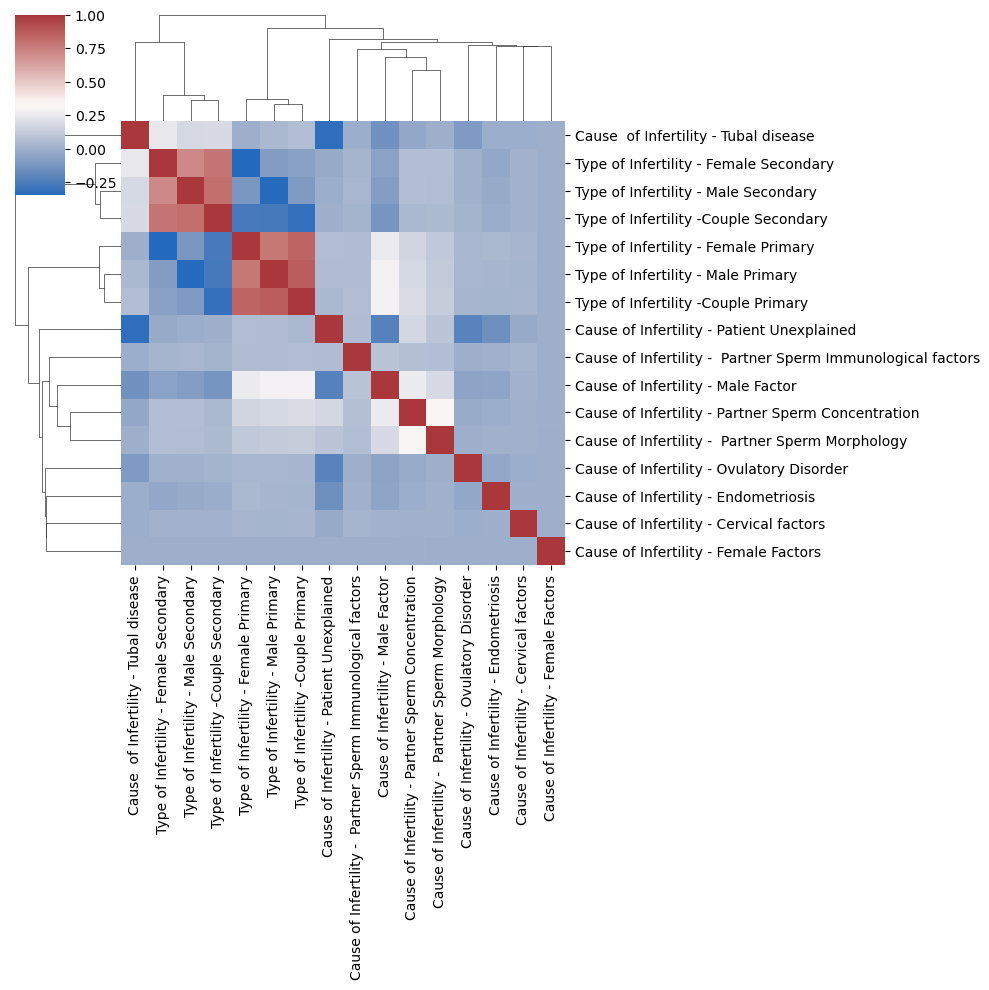

In [209]:
sns.clustermap(df[[x for x in df.columns if 'Cause ' in x or 'Type of' in x][:-2]].corr(), label = True, cmap="vlag")

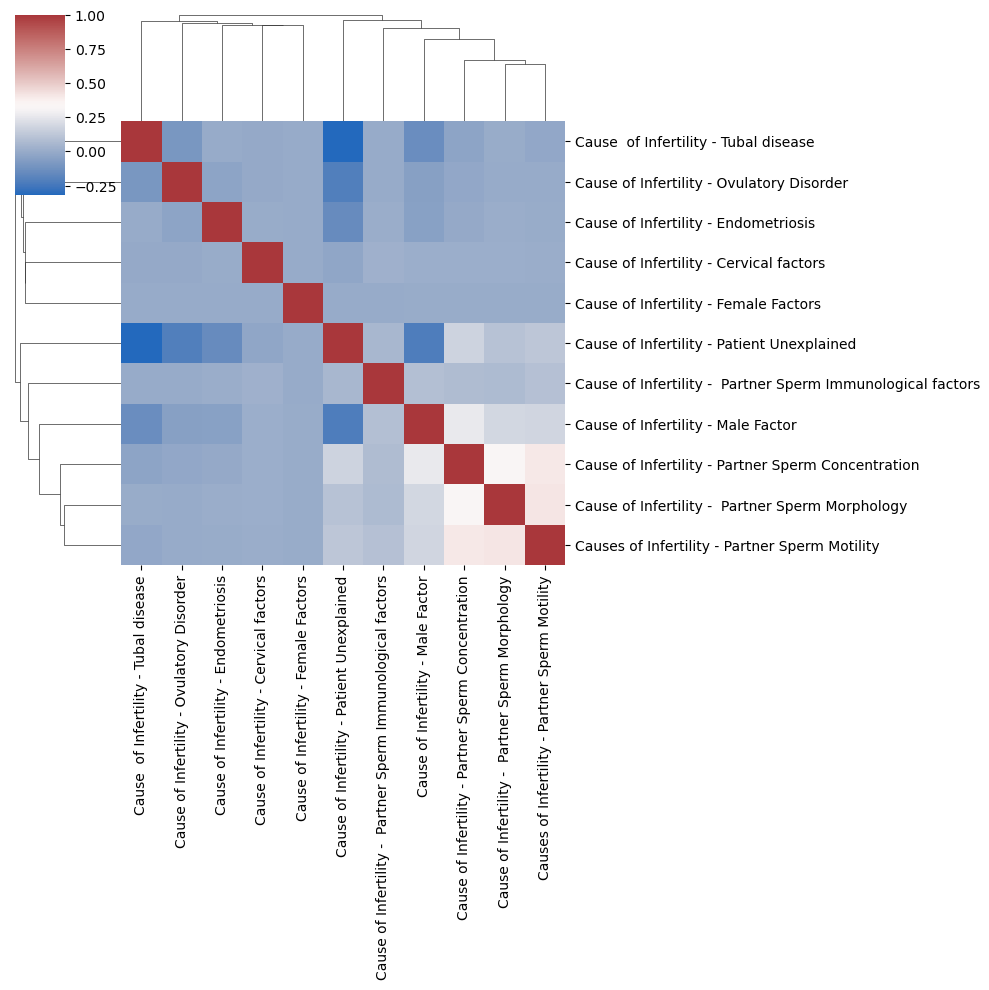

In [141]:
sns.clustermap(df[[x for x in df.columns if 'Cause' in x]].corr(), label = True, cmap="vlag")

In [142]:
pd.concat([~df[['Sperm Donor Age at Registration']].isna(),df['Sperm From']=='Donor'],axis=1).corr()

,Sperm Donor Age at Registration,Sperm From
Sperm Donor Age at Registration,1.000000,0.976204
Sperm From,0.976204,1.000000


In [143]:
df['is_Donor_sperm'] = (df['Sperm From']=='Donor')

In [144]:
[x for x in df.columns if 'Partner Sperm' in x]

['Cause of Infertility - Partner Sperm Concentration',
 'Cause of Infertility -  Partner Sperm Morphology',
 'Causes of Infertility - Partner Sperm Motility',
 'Cause of Infertility -  Partner Sperm Immunological factors',
 'Eggs Mixed With Partner Sperm']

In [145]:
df[[x for x in df.columns if 'Cause' in x][:-1]+['is_Donor_sperm','PGT','Stimulation used','is_ICSI','Fresh Cycle']].corr()

,Cause of Infertility - Tubal disease,Cause of Infertility - Ovulatory Disorder,Cause of Infertility - Male Factor,Cause of Infertility - Patient Unexplained,Cause of Infertility - Endometriosis,Cause of Infertility - Cervical factors,Cause of Infertility - Female Factors,Cause of Infertility - Partner Sperm Concentration,Cause of Infertility - Partner Sperm Morphology,Causes of Infertility - Partner Sperm Motility,is_Donor_sperm,PGT,Stimulation used,is_ICSI,Fresh Cycle
Cause of Infertility - Tubal disease,1.000000,-0.093511,-0.140735,-0.318912,-0.003145,-0.007769,-0.001198,-0.032809,0.001497,-0.016448,-0.084971,-0.022275,0.012406,-0.215364,-0.013032
Cause of Infertility - Ovulatory Disorder,-0.093511,1.000000,-0.051390,-0.215347,-0.032108,-0.005106,-0.000890,-0.015847,-0.002394,-0.002254,-0.044160,-0.006143,-0.070924,-0.041038,-0.035094
Cause of Infertility - Male Factor,-0.140735,-0.051390,1.000000,-0.225930,-0.047684,0.014972,0.001769,0.258366,0.189513,0.182555,0.048621,-0.024993,0.046569,0.284210,0.017064
Cause of Infertility - Patient Unexplained,-0.318912,-0.215347,-0.225930,1.000000,-0.149828,-0.022731,-0.001485,0.174709,0.099421,0.119438,-0.059614,0.018007,0.037144,-0.181672,0.013713
Cause of Infertility - Endometriosis,-0.003145,-0.032108,-0.047684,-0.149828,1.000000,0.003065,-0.000614,-0.006349,0.008109,0.004026,-0.035258,-0.011321,0.019710,-0.070269,0.011875
Cause of Infertility - Cervical factors,-0.007769,-0.005106,0.014972,-0.022731,0.003065,1.000000,-0.000099,0.011667,0.011368,0.007359,-0.006120,-0.002527,0.002499,-0.028382,0.001130
Cause of Infertility - Female Factors,-0.001198,-0.000890,0.001769,-0.001485,-0.000614,-0.000099,1.000000,0.004645,0.001905,0.002002,0.004579,-0.000151,-0.003260,-0.000889,0.001135
Cause of Infertility - Partner Sperm Concentration,-0.032809,-0.015847,0.258366,0.174709,-0.006349,0.011667,0.004645,1.000000,0.324227,0.406452,0.137214,-0.015263,0.033965,-0.126858,0.021517
Cause of Infertility - Partner Sperm Morphology,0.001497,-0.002394,0.189513,0.099421,0.008109,0.011368,0.001905,0.324227,1.000000,0.412742,0.000711,-0.011284,0.025318,-0.093721,0.020919
Causes of Infertility - Partner Sperm Motility,-0.016448,-0.002254,0.182555,0.119438,0.004026,0.007359,0.002002,0.406452,0.412742,1.000000,0.020773,-0.010870,0.022226,-0.095147,0.015293


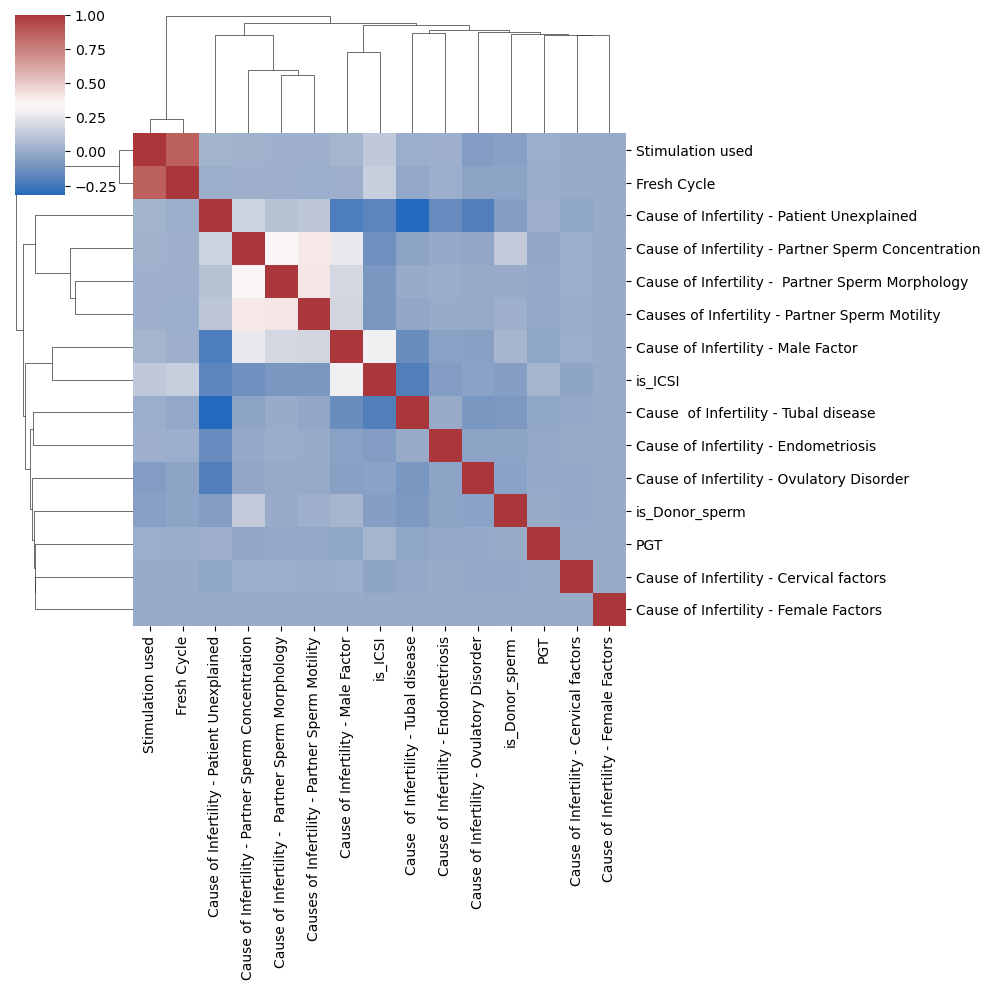

In [146]:
sns.clustermap(df[[x for x in df.columns if 'Cause' in x][:-1]+['is_Donor_sperm','PGT','Stimulation used','is_ICSI','Fresh Cycle']].corr(),cmap="vlag")

In [150]:
df['Stimulation used'].fillna(0,inplace = True)

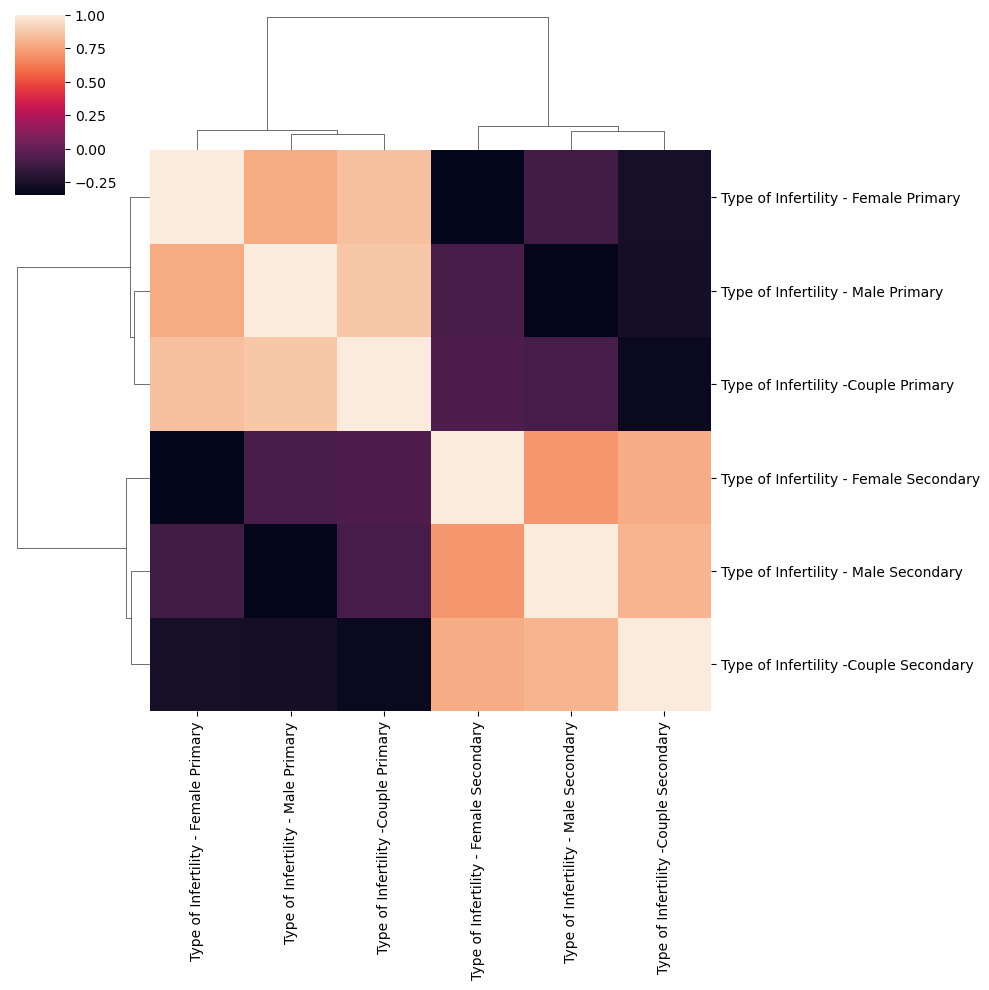

In [153]:
sns.clustermap(df[[x for x in df.columns if 'Type of Infertility' in x]].corr(), label = True)

In [155]:
df['Number of foetal sacs with fetal pulsation'].unique()

array([ 0,  3,  1,  2,  4,  5, 10, 27, 40, 39,  8], dtype=int64)

In [157]:
df['Number of Live Births'].unique()

array([0, 3, 1, 2, 4], dtype=int64)

In [158]:
df['Heart One Birth Outcome'].value_counts()

Heart One Birth Outcome
Live  Birth                       244888
Miscarriage                        31497
Lost to Follow Up                   3303
Termination                         1934
Ectotopic/Hetrotopic Pregnancy      1436
Still Birth                         1205
Embryo Reduction                     162
Name: count, dtype: int64

In [159]:
df['Heart One Birth Outcome'].unique()

array([nan, 'Live  Birth', 'Ectotopic/Hetrotopic Pregnancy',
       'Miscarriage', 'Lost to Follow Up', 'Still Birth', 'Termination',
       'Embryo Reduction'], dtype=object)

In [160]:
df['Heart One Success Birth'] = (df['Heart One Birth Outcome']=='Live  Birth')

In [161]:
df['Early Outcome']

0                                       None 
1                                       None 
2                                       None 
3          Intrauterine Fetal Pulsation Seen 
4                                       None 
                          ...                
1135898    Intrauterine Fetal Pulsation Seen 
1135899    Intrauterine Fetal Pulsation Seen 
1135900                                 None 
1135901                                 None 
1135902    Intrauterine Fetal Pulsation Seen 
Name: Early Outcome, Length: 1135903, dtype: object

In [162]:
df['Early Outcome'] = df['Early Outcome'].astype('str')

In [163]:
df['Early Outcome'].value_counts()

Early Outcome
None                                                                            637559
Intrauterine Fetal Pulsation Seen                                               283340
nan                                                                             142518
Biochemical Pregnancy Only                                                       45132
Misscarriage                                                                     21399
Ectopic                                                                           3570
Misscarriage ,Intrauterine Fetal Pulsation Seen                                   1350
Biochemical Pregnancy Only ,Misscarriage                                           394
None ,Biochemical Pregnancy Only                                                   138
None ,Intrauterine Fetal Pulsation Seen                                             96
Ectopic ,Intrauterine Fetal Pulsation Seen                                          87
Biochemical Pregnancy Only ,I

In [164]:
df['is_Pulsation'] = df['Early Outcome'].apply(lambda x: x.strip() == 'Intrauterine Fetal Pulsation Seen')

In [165]:
df['Heart One Birth Congenital Abnormalities'].fillna(0,inplace=True)

In [216]:
df[['is_Pulsation','Birth Weight Lower Bound','Heart One Success Birth','Heart One Birth Congenital Abnormalities',
'Total number of live births - conceived through IVF','Live Birth Occurrence']].corr()

,is_Pulsation,Birth Weight Lower Bound,Heart One Success Birth,Heart One Birth Congenital Abnormalities,Total number of live births - conceived through IVF,Live Birth Occurrence
is_Pulsation,1.000000,0.860891,0.901964,0.101163,0.029054,0.910927
Birth Weight Lower Bound,0.860891,1.000000,0.954526,0.101450,0.036744,0.944940
Heart One Success Birth,0.901964,0.954526,1.000000,0.112836,0.027115,0.989957
Heart One Birth Congenital Abnormalities,0.101163,0.101450,0.112836,1.000000,0.005324,0.111703
Total number of live births - conceived through IVF,0.029054,0.036744,0.027115,0.005324,1.000000,0.027396
Live Birth Occurrence,0.910927,0.944940,0.989957,0.111703,0.027396,1.000000


In [192]:
for col in [x for x in df.columns if 'date of' in x.lower()]:
    print(col,df[col].unique())

Date patient started trying to become pregnant OR date of last pregnancy [nan  2.  5.  8.  4.  1. 15.  7.  6. 14.  3. 10.  0. 13.  9. 19. 16. 12.
 11. 17. 20. 18.]
Date of Egg Collection [nan  0.]
Date of Egg Thawing [ nan   0. 999.   1.   5.]
Date of Egg Mixing [ nan   0. 999.   6.   2.   3.   1.   5.   4.   7.]
Date of Embryo Thawing [ nan   0. 999.   2.   1.   3.   5.   4.   6.   7.]
Date of Embryo Transfer [  0.  nan   2.   3.   1. 999.   4.   5.   6.   7.]


In [217]:
for col in [x for x in df.columns if 'date of' in x.lower()]:
    df[col].fillna(0, inplace = True)
    df[col] = df[col].apply(lambda x: 0 if x==999. else x)

In [218]:
for col in [x for x in df.columns if 'date of' in x.lower()]:
    print(col,df[col].unique())

Date patient started trying to become pregnant OR date of last pregnancy [ 0.  2.  5.  8.  4.  1. 15.  7.  6. 14.  3. 10. 13.  9. 19. 16. 12. 11.
 17. 20. 18.]
Date of Egg Collection [0.]
Date of Egg Thawing [0. 1. 5.]
Date of Egg Mixing [0. 6. 2. 3. 1. 5. 4. 7.]
Date of Embryo Thawing [0. 2. 1. 3. 5. 4. 6. 7.]
Date of Embryo Transfer [0. 2. 3. 1. 4. 5. 6. 7.]


In [168]:
df['Sperm Donor Age at Registration'].value_counts()

Sperm Donor Age at Registration
Between 21 and 25    14897
Between 26 and 30    12759
Between 31 and 35    10576
Between 36 and 40    10074
Between 41 and 45     6631
<= 20                 3812
999                   2919
Name: count, dtype: int64

In [169]:
df['Eggs Mixed With Donor sperm'].unique()

array([0.0, 5.0, 12.0, 7.0, 13.0, 8.0, 10.0, 4.0, 11.0, 9.0, 16.0, 1.0,
       6.0, 2.0, 15.0, 14.0, 3.0, 26.0, 21.0, 22.0, 19.0, 24.0, 28.0,
       17.0, 23.0, 25.0, 18.0, 29.0, 33.0, 27.0, 35.0, 31.0, 20.0, 41.0,
       36.0, 42.0, 32.0, 30.0, 43.0, 45.0, 34.0, 49.0, 38, 39, '0', '6',
       '4', '23', '15', '8', '10', '9', '7', '11', '> 50', '22', '16',
       '13', '5', '21', '12', '3', '27', '18', '2', '33', '17', '14', '1',
       '19', '24', '20', '26', '48', '25', '30', 40, 47, 37, '28', '29',
       '31', '37', 50.0, '34', 44], dtype=object)

In [170]:
df['Eggs Mixed With Donor sperm'] = df['Eggs Mixed With Donor sperm'].apply(lambda x: 60 if x=='> 50' else x)
df['Eggs Mixed With Donor sperm'] = df['Eggs Mixed With Donor sperm'].astype('int')

In [171]:
df['Eggs Mixed With Partner Sperm'].unique()

array(['0', '3', '9', '7', '8', '4', '5', '6', '12', '11', '24', '10',
       '18', '15', '2', '13', '14', '16', '17', '23', '19', '1', '21',
       '34', '44', '20', '31', '22', '29', '27', '26', '25', '30', '37',
       '28', '32', '45', '36', '40', '41', '33', '42', '> 50', '35', '38',
       '39', 5, 10, 3, 4, 6, 9, 23, 0, 11, 1, 8, 2, 7, 12, 13, 15, 20, 16,
       14, 19, 26, 17, 18, 24, 31, 22, 21, 33, 28, 27, 29, 25, 32, 50, 36,
       30, 48, 39, 38, 35, 34, 41, 40, '43', 37, 46, 43, 47, 42, 44, '47',
       '46', 49, '49', '50', '48', 45], dtype=object)

In [172]:
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].apply(lambda x: 60 if x=='> 50' else x)
df['Eggs Mixed With Partner Sperm'] = df['Eggs Mixed With Partner Sperm'].astype('int')

In [173]:
df['Eggs Micro-injected'] = df['Eggs Micro-injected'].apply(lambda x: 60 if x=='> 50' else x)
df['Eggs Micro-injected'] = df['Eggs Micro-injected'].astype('int')

In [174]:
df['Total Eggs Mixed'] = df['Total Eggs Mixed'].apply(lambda x: 60 if x=='> 50' else x)
df['Total Eggs Mixed'] = df['Total Eggs Mixed'].astype('int')

In [175]:
df['Elective Single Embryo Transfer'].fillna(0,inplace = True)

In [176]:
df['Elective Single Embryo Transfer'].value_counts()

Elective Single Embryo Transfer
0.0    1026189
1.0     109714
Name: count, dtype: int64

In [177]:
df['is_PatientEgg'] = (df['Egg Source'] =='Patient')

In [178]:
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].apply(lambda x: 60 if x=='> 50' else x)
df['Fresh Eggs Collected'] = df['Fresh Eggs Collected'].astype('int')

In [179]:
df['Fresh Eggs Stored'] = df['Fresh Eggs Stored'].apply(lambda x: 60 if x=='> 50' else x)
df['Fresh Eggs Stored'] = df['Fresh Eggs Stored'].astype('int')

In [180]:
for col in [x for x in df.columns if 'Embryos' in x]:
    print(col,df[col].unique())

Total Embryos Created [0.0 3.0 5.0 6.0 7.0 2.0 4.0 8.0 9.0 1.0 12.0 10.0 13.0 19.0 11.0 15.0
 16.0 17.0 14.0 27.0 20.0 18.0 22.0 24.0 21.0 36.0 31.0 23.0 30.0 28.0
 25.0 29.0 34.0 26.0 33.0 35.0 37.0 32.0 48.0 41.0 38 40 42 '3' '10' '14'
 '0' '15' '12' '9' '2' '5' '4' '11' '1' '6' '7' '21' '8' '13' '19' '18'
 '20' '16' '33' '17' '22' '36' '23' '26' '25' '28' '> 50' '27' '32' '24'
 '37' '30' '43' '34' '29' 43 39 49 '39' '31' '35' 45 44 46.0 '49']
Embryos from Eggs Micro-injected [0.0 14.0 2.0 3.0 11.0 4.0 1.0 7.0 8.0 5.0 12.0 6.0 9.0 10.0 13.0 32.0
 15.0 16.0 17.0 20.0 21.0 18 22 19 26 23 25 24 30 28 29 27 31 34 36 '3'
 '4' '0' '9' '8' '11' '2' '7' '10' '6' '12' '1' '5' '21' '13' '14' '15'
 '16' '17' '18' '> 50' '19' '20' '24' 35 33.0 38.0 37.0 43.0 41.0 42.0
 39.0]
Total Embryos Thawed [0.0 4.0 7.0 2.0 3.0 8.0 5.0 1.0 11 9 6 10 17 12 16 13 14 '0' '3' '5' '8'
 '4' '6' '10' '2' '1' '7' '11' '9' '19' '> 50' 15 21.0 18.0 19.0 20.0 23.0
 22.0 25.0 26.0 24.0 32.0 27.0 30.0]
Embryos Transfere

In [181]:
for col in ['Total Embryos Created',
 'Embryos from Eggs Micro-injected',
 'Total Embryos Thawed',
 'Embryos Stored For Use By Patient',
 'Embryos (from Eggs Micro-injected) Stored For Use By Patient']:
 df[col] = df[col].apply(lambda x: 60 if x=='> 50' else x)
 df[col] = df[col].astype('int')
 

In [182]:
df['Fresh Eggs Collected'].unique()

array([ 0,  3,  9,  7,  5,  8,  4,  6, 12, 11, 36, 10, 21, 18, 15, 13,  2,
       14, 16, 24, 17, 23, 19,  1, 34, 44, 20, 31, 22, 29, 27, 26, 25, 30,
       37, 60, 28, 32, 45, 33, 40, 35, 41, 42, 39, 38, 50, 48, 43, 46, 47,
       49])

In [220]:
df.columns

Index(['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total Number of Previous cycles, Both IVF and DI',
       'Total Number of Previous treatments, Both IVF and DI at clinic',
       'Total Number of Previous IVF cycles',
       'Total Number of Previous DI cycles',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Total number of live births - conceived through IVF or DI',
       ...
       'Heart Four Sex', 'Heart Four Delivery Date',
       'Heart Four Birth Congenital Abnormalities', 'Birth Weight Lower Bound',
       'is_ICSI', 'PGT', 'is_Donor_sperm', 'Heart One Success Birth',
       'is_Pulsation', 'is_PatientEgg'],
      dtype='object', length=102)

In [227]:
df[~(df['Live Birth Occurrence'] == df['Heart One Success Birth'])].to_csv('Live Birth Heart One Failure.csv')

In [231]:
df = df[df.is_PatientEgg==1]
df = df[df['Patient acting as Surrogate'] ==0]
df = df[df['is_Donor_sperm'] == 1]

In [232]:
df.shape

(51276, 102)

In [254]:
df['Sperm Donor Age at Registration'].value_counts()

Sperm Donor Age at Registration
Between 21 and 25    13083
Between 26 and 30    10904
Between 31 and 35     8571
Between 36 and 40     7747
Between 41 and 45     5180
<= 20                 3314
999                   2013
999                    464
Name: count, dtype: int64

In [256]:
df['Sperm Donor Age at Registration'].unique()

array(['Between 31 and 35', 'Between 21 and 25', '<= 20',
       'Between 26 and 30', 'Between 36 and 40', '999',
       'Between 41 and 45', 999], dtype=object)

In [257]:
def convert_donor_age(x):
    if x == 'Between 31 and 35':
        return '31-35'
    elif x == 'Between 21 and 25':
        return '21-25'
    elif x == '<= 20':
        return x
    elif x == 'Between 26 and 30':
        return '26-30'
    elif x == 'Between 36 and 40':
        return '36-40'
    elif x == 'Between 41 and 45':
        return '41-45'
    else:
        return 'NA'

In [260]:
df['Sperm Donor Age at Registration'] = df['Sperm Donor Age at Registration'].apply(convert_donor_age)

In [262]:
df = df[df['Sperm Donor Age at Registration'] !='NA']

In [263]:
df['Donor_Older_than_30'] = df['Sperm Donor Age at Registration'].apply(lambda x:1 if x in ['31-35', '36-40', '41-45'] else 0)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\527439292.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Donor_Older_than_30'] = df['Sperm Donor Age at Registration'].apply(lambda x:1 if x in ['31-35', '36-40', '41-45'] else 0)


In [264]:
df['Sperm Donor Age at Registration'].value_counts()

Sperm Donor Age at Registration
21-25    13083
26-30    10904
31-35     8571
36-40     7747
41-45     5180
<= 20     3314
Name: count, dtype: int64

In [267]:
df.shape

(48799, 103)

In [270]:
df = df[
    ['Patient Age at Treatment',
       'Date patient started trying to become pregnant OR date of last pregnancy',
       'Total number of previous pregnancies, Both IVF and DI',
       'Total number of IVF pregnancies', 'Total number of DI pregnancies',
       'Type of Infertility - Female Primary',
       'Type of Infertility - Female Secondary',
       'Type of Infertility - Male Primary',
       'Type of Infertility - Male Secondary',
       'Type of Infertility -Couple Primary',
       'Type of Infertility -Couple Secondary',
       'Cause  of Infertility - Tubal disease',
       'Cause of Infertility - Ovulatory Disorder',
       'Cause of Infertility - Male Factor',
       'Cause of Infertility - Patient Unexplained',
       'Cause of Infertility - Endometriosis',
       'Cause of Infertility - Cervical factors',
       'Cause of Infertility - Female Factors',
       'Cause of Infertility - Partner Sperm Concentration',
       'Cause of Infertility -  Partner Sperm Morphology',
       'Causes of Infertility - Partner Sperm Motility',
       'Cause of Infertility -  Partner Sperm Immunological factors',
       'Stimulation used', 'Sperm Donor Age at Registration', 'Donated embryo',
       'Patient acting as Surrogate', 'Elective Single Embryo Transfer',
       'Fresh Cycle', 'Frozen Cycle', 'Eggs Thawed', 'Fresh Eggs Collected',
       'Fresh Eggs Stored', 'Total Eggs Mixed',
       'Eggs Mixed With Partner Sperm', 'Eggs Mixed With Donor sperm',
       'Total Embryos Created', 'Eggs Micro-injected',
       'Embryos from Eggs Micro-injected', 'Total Embryos Thawed',
       'Embryos Transfered', 'Embryos Transfered from Eggs Micro-injected',
       'Embryos Stored For Use By Patient',
       'Embryos (from Eggs Micro-injected) Stored For Use By Patient',
       'Date of Egg Collection', 'Date of Egg Thawing', 'Date of Egg Mixing',
       'Date of Embryo Thawing', 'Date of Embryo Transfer',
       'Year of Treatment', 'Live Birth Occurrence', 'Number of Live Births',
       'Heart One Birth Congenital Abnormalities', 'Birth Weight Lower Bound',
       'is_ICSI', 'PGT', 'is_Donor_sperm', 'Heart One Success Birth',
       'is_Pulsation', 'is_PatientEgg', 'Donor_Older_than_30']
]

In [271]:
df.head()

,Patient Age at Treatment,Date patient started trying to become pregnant OR date of last pregnancy,"Total number of previous pregnancies, Both IVF and DI",Total number of IVF pregnancies,Total number of DI pregnancies,Type of Infertility - Female Primary,Type of Infertility - Female Secondary,Type of Infertility - Male Primary,Type of Infertility - Male Secondary,Type of Infertility -Couple Primary,...,Number of Live Births,Heart One Birth Congenital Abnormalities,Birth Weight Lower Bound,is_ICSI,PGT,is_Donor_sperm,Heart One Success Birth,is_Pulsation,is_PatientEgg,Donor_Older_than_30
4,35-37,0.0,1,1,0,0,1,0,1,0,...,0,0.0,0.0,False,False,True,False,False,True,1
19,40-42,0.0,0,0,0,0,1,0,1,0,...,0,0.0,0.0,False,False,True,False,False,True,0
21,35-37,0.0,0,0,0,1,0,0,1,1,...,2,0.0,2.5,False,False,True,True,True,True,0
22,38-39,0.0,0,0,0,0,0,1,0,0,...,0,0.0,0.0,False,False,True,False,False,True,0
23,18 - 34,0.0,0,0,0,1,0,1,0,1,...,0,0.0,0.0,False,False,True,False,False,True,0


In [268]:
df.to_csv('1991_2016 Donor Patient.csv', index = False)

In [269]:
df[[x for x in df.columns if 'date' in x.lower()]].head()

,Date patient started trying to become pregnant OR date of last pregnancy,Date of Egg Collection,Date of Egg Thawing,Date of Egg Mixing,Date of Embryo Thawing,Date of Embryo Transfer,Heart One Delivery Date,Heart Two Delivery Date,Heart Three Delivery Date,Heart Four Delivery Date
4,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
19,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
21,0.0,0.0,0.0,0.0,0.0,0.0,1994.0,1994.0,NaN,NaN
22,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
23,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN


In [233]:
df[[ 'Eggs Thawed',  
   'Embryos Transfered',
   'Number of foetal sacs with fetal pulsation',
  'Number of Live Births']].corr()

,Eggs Thawed,Embryos Transfered,Number of foetal sacs with fetal pulsation,Number of Live Births
Eggs Thawed,1.000000,-0.010034,-0.007944,-0.007822
Embryos Transfered,-0.010034,1.000000,0.174397,0.151543
Number of foetal sacs with fetal pulsation,-0.007944,0.174397,1.000000,0.916018
Number of Live Births,-0.007822,0.151543,0.916018,1.000000


In [234]:
df[['Date of Egg Thawing', 'Date of Egg Mixing','Date of Embryo Thawing', 'Date of Embryo Transfer']].corr()

,Date of Egg Thawing,Date of Egg Mixing,Date of Embryo Thawing,Date of Embryo Transfer
Date of Egg Thawing,1.000000,-0.000182,-0.000092,0.007840
Date of Egg Mixing,-0.000182,1.000000,0.024170,0.015628
Date of Embryo Thawing,-0.000092,0.024170,1.000000,0.005515
Date of Embryo Transfer,0.007840,0.015628,0.005515,1.000000


In [5]:
[x for x in df.columns if 'age' in x.lower()]

['Patient Age at Treatment',
 'Egg Donor Age at Registration',
 'Sperm Donor Age at Registration']

In [7]:
[x for x in df.columns if 'birth' in x.lower()]

['Total number of live births - conceived through IVF or DI',
 'Total number of live births - conceived through IVF',
 'Total number of live births - conceived through DI',
 'Live Birth Occurrence',
 'Number of Live Births',
 'Heart One Birth Outcome',
 'Heart One Birth Weight',
 'Heart One Birth Congenital Abnormalities',
 'Heart Two Birth Outcome',
 'Heart Two Birth Weight',
 'Heart Two Birth Congenital Abnormalities',
 'Heart Three Birth Outcome',
 'Heart Three Birth Weight',
 'Heart Three Birth Congenital Abnormalities',
 'Heart Four Birth Outcome',
 'Heart Four Birth Weight',
 'Heart Four Birth Congenital Abnormalities']

In [19]:
[x for x in df.columns if 'cycle' in x.lower() or 'pregnan' in x.lower()]

['Date patient started trying to become pregnant OR date of last pregnancy',
 'Total Number of Previous cycles, Both IVF and DI',
 'Total Number of Previous IVF cycles',
 'Total Number of Previous DI cycles',
 'Total number of previous pregnancies, Both IVF and DI',
 'Total number of IVF pregnancies',
 'Total number of DI pregnancies',
 'Fresh Cycle',
 'Frozen Cycle']

In [9]:
df['Sperm Donor Age at Registration'].value_counts()

Sperm Donor Age at Registration
Between 21 and 25    14897
Between 26 and 30    12759
Between 31 and 35    10576
Between 36 and 40    10074
Between 41 and 45     6631
<= 20                 3812
999                   2919
Name: count, dtype: int64

In [43]:
df['Patient Age at Treatment'].value_counts()

Patient Age at Treatment
18 - 34    513349
35-37      261270
38-39      156144
40-42      134740
43-44       37241
45-50       21483
999         11676
Name: count, dtype: int64

In [12]:
patient_donor = df.groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])['Number of Live Births'].sum()/df.groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])['Number of Live Births'].count()

In [15]:
patient_donor.to_csv('patient_donor.csv')

In [16]:
 df.groupby(['Sperm Donor Age at Registration'])['Number of Live Births'].sum()/df.groupby(['Sperm Donor Age at Registration'])['Number of Live Births'].count()

Sperm Donor Age at Registration
999                  0.305584
<= 20                0.285152
Between 21 and 25    0.302343
Between 26 and 30    0.314915
Between 31 and 35    0.317417
Between 36 and 40    0.318741
Between 41 and 45    0.319107
Name: Number of Live Births, dtype: float64

In [26]:
df.groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])[['Number of Live Births',
                                           'Fresh Cycle', 'Frozen Cycle']].sum().to_csv('birth_cycles.csv')

In [29]:
df[df['Fresh Cycle']==1].groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])[['Number of Live Births',
                                           'Fresh Cycle']].sum().to_csv('Fresh.csv')

In [30]:
df[df['Frozen Cycle']==1].groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])[['Number of Live Births',
                                           'Frozen Cycle']].sum().to_csv('Frozen.csv')

In [ ]:
df[df['Fresh Cycle']==1].groupby(['Patient Age at Treatment','Sperm Donor Age at Registration'])[['Number of Live Births',
                                           'Fresh Cycle']].sum()

In [235]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Birth Weight Lower Bound', aggfunc= np.mean)


C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3073518941.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Birth Weight Lower Bound', aggfunc= np.mean)


is_ICSI                             False               True           
Fresh Cycle                           0.0       1.0       0.0       1.0
Sperm Donor Age at Registration                                        
999                              3.164894  2.784653  3.000000  2.851675
<= 20                            2.970588  2.818182  3.400000  2.944444
Between 21 and 25                3.033214  2.732648  3.112500  2.910546
Between 26 and 30                3.007675  2.755522  3.000000  2.882243
Between 31 and 35                3.072559  2.808367  3.172414  2.883603
Between 36 and 40                3.033923  2.810096  2.920455  2.874595
Between 41 and 45                3.022388  2.899701  2.942308  2.856308

In [236]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Birth Weight Lower Bound', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3757942137.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Birth Weight Lower Bound', aggfunc= np.mean)


is_ICSI                      False               True           
Fresh Cycle                    0.0       1.0       0.0       1.0
Patient Age at Treatment                                        
18 - 34                   3.010426  2.748010  2.968085  2.867964
35-37                     3.038860  2.790254  3.072917  2.907857
38-39                     3.116071  2.851052  3.103448  2.880615
40-42                     3.049774  2.894389  3.129630  2.882253
43-44                     3.100000  2.955882  3.125000  2.941176
45-50                     2.777778  2.800000       NaN  3.100000

In [237]:
df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Success Birth', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3561024331.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Success Birth', aggfunc= np.mean)


is_ICSI                             False               True           
Fresh Cycle                           0.0       1.0       0.0       1.0
Sperm Donor Age at Registration                                        
999                              0.235000  0.239905  0.303571  0.293128
<= 20                            0.207317  0.235371  0.263158  0.192661
Between 21 and 25                0.222800  0.235729  0.250000  0.245379
Between 26 and 30                0.225185  0.250299  0.182292  0.268844
Between 31 and 35                0.238065  0.260915  0.180124  0.247124
Between 36 and 40                0.240085  0.269850  0.280255  0.266494
Between 41 and 45                0.281809  0.273770  0.183099  0.260182

In [238]:
df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Success Birth', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\672291716.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Success Birth', aggfunc= np.mean)


is_ICSI                      False               True           
Fresh Cycle                    0.0       1.0       0.0       1.0
Patient Age at Treatment                                        
18 - 34                   0.263623  0.328291  0.274854  0.360020
35-37                     0.255629  0.263982  0.233010  0.308370
38-39                     0.208333  0.215051  0.182390  0.242824
40-42                     0.163341  0.131112  0.166667  0.129703
43-44                     0.136986  0.053925  0.105263  0.046512
45-50                     0.060811  0.023697  0.000000  0.045662
999                            NaN  0.000000       NaN  0.000000

In [239]:
df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\514707595.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                             False               True           
Fresh Cycle                           0.0       1.0       0.0       1.0
Sperm Donor Age at Registration                                        
999                              0.267500  0.280285  0.321429  0.333801
<= 20                            0.245427  0.279476  0.263158  0.223242
Between 21 and 25                0.256000  0.278875  0.300000  0.281885
Between 26 and 30                0.265679  0.290646  0.208333  0.303015
Between 31 and 35                0.277010  0.297921  0.204969  0.284142
Between 36 and 40                0.277620  0.305916  0.312102  0.307891
Between 41 and 45                0.323870  0.310246  0.211268  0.298480

In [240]:
df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\318444827.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                      False               True           
Fresh Cycle                    0.0       1.0       0.0       1.0
Patient Age at Treatment                                        
18 - 34                   0.295411  0.366228  0.307018  0.398299
35-37                     0.294481  0.306647  0.257282  0.344053
38-39                     0.246280  0.256013  0.188679  0.276119
40-42                     0.213599  0.176331  0.228395  0.176627
43-44                     0.180822  0.084060  0.105263  0.075239
45-50                     0.081081  0.035545  0.000000  0.059361
999                            NaN  0.000000       NaN  0.000000

In [241]:
df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\45937613.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                             False               True           
Elective Single Embryo Transfer       0.0       1.0       0.0       1.0
Patient Age at Treatment                                               
18 - 34                          0.328058  0.510011  0.367545  0.466216
35-37                            0.290276  0.412924  0.328322  0.379227
38-39                            0.248733  0.314770  0.262586  0.339869
40-42                            0.181368  0.245283  0.180842  0.161290
43-44                            0.103316  0.172414  0.074766  0.150000
45-50                            0.041667  0.222222  0.051948  0.500000
999                              0.000000       NaN  0.000000       NaN

In [242]:
df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','PGT'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3877594413.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','PGT'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                      False               True           
PGT                          False     True      False     True 
Patient Age at Treatment                                        
18 - 34                   0.348587  0.400000  0.391505  0.142857
35-37                     0.303653  0.100000  0.337256  0.250000
38-39                     0.253842  0.166667  0.270357  0.136364
40-42                     0.184691  0.192982  0.181857  0.123288
43-44                     0.103960  0.400000  0.076398  0.083333
45-50                     0.047788  0.000000  0.059908  0.000000
999                       0.000000       NaN  0.000000       NaN

In [243]:
df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\1163284422.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                             False               True           
Elective Single Embryo Transfer       0.0       1.0       0.0       1.0
Sperm Donor Age at Registration                                        
999                              0.263300  0.383459  0.319277  0.419048
<= 20                            0.260215  0.480769  0.207668  0.346154
Between 21 and 25                0.259046  0.446988  0.266469  0.393443
Between 26 and 30                0.271614  0.433380  0.274194  0.413043
Between 31 and 35                0.279248  0.410334  0.256690  0.398176
Between 36 and 40                0.277838  0.441578  0.287129  0.433803
Between 41 and 45                0.296587  0.425163  0.267660  0.442623

In [244]:
df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','PGT'], values='is_Pulsation', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\3330803197.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df.pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','PGT'], values='is_Pulsation', aggfunc= np.mean)


is_ICSI                             False               True           
PGT                                 False     True      False     True 
Sperm Donor Age at Registration                                        
999                              0.276029  0.333333  0.335079  0.000000
<= 20                            0.272016  0.200000  0.228650  0.000000
Between 21 and 25                0.273507  0.300000  0.285964  0.108108
Between 26 and 30                0.285106  0.206897  0.297209  0.125000
Between 31 and 35                0.293306  0.130435  0.280019  0.142857
Between 36 and 40                0.298667  0.187500  0.309922  0.148148
Between 41 and 45                0.314345  0.000000  0.295558  0.064516

In [245]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\2299639646.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Patient Age at Treatment'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)


is_ICSI                      False               True           
Fresh Cycle                    0.0       1.0       0.0       1.0
Patient Age at Treatment                                        
18 - 34                   0.003626  0.012304  0.031915  0.004170
35-37                     0.013817  0.016949  0.020833  0.004286
38-39                     0.017857  0.012182  0.000000  0.004728
40-42                     0.009050  0.008251  0.000000  0.000000
43-44                     0.000000  0.014706  0.000000  0.029412
45-50                     0.000000  0.100000       NaN  0.000000

In [246]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\1574819481.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Fresh Cycle'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)


is_ICSI                             False               True           
Fresh Cycle                           0.0       1.0       0.0       1.0
Sperm Donor Age at Registration                                        
999                              0.010638  0.019802  0.000000  0.004785
<= 20                            0.014706  0.016698  0.000000  0.000000
Between 21 and 25                0.010772  0.010797  0.050000  0.003766
Between 26 and 30                0.004386  0.015522  0.028571  0.005607
Between 31 and 35                0.005277  0.015936  0.000000  0.004049
Between 36 and 40                0.014749  0.009615  0.022727  0.003236
Between 41 and 45                0.003731  0.007485  0.000000  0.004673

In [247]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','PGT'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\1963141946.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','PGT'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)


is_ICSI                             False           True       
PGT                                 False True      False True 
Sperm Donor Age at Registration                                
999                              0.016949   0.0  0.004425   NaN
<= 20                            0.016320   0.0  0.000000   NaN
Between 21 and 25                0.010817   0.0  0.007055   0.0
Between 26 and 30                0.013170   0.0  0.007055   0.0
Between 31 and 35                0.013480   0.0  0.003854   0.0
Between 36 and 40                0.010901   0.0  0.004552   0.0
Between 41 and 45                0.006410   NaN  0.004425   0.0

In [248]:
df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)

C:\Users\tsong\AppData\Local\Temp\ipykernel_9716\823950482.py:1: FutureWarning: The provided callable <function mean at 0x00000262C1BADBC0> is currently using DataFrameGroupBy.mean. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "mean" instead.
  df[df['Heart One Success Birth']==1].pivot_table(index=['Sperm Donor Age at Registration'], columns=['is_ICSI','Elective Single Embryo Transfer'], values='Heart One Birth Congenital Abnormalities', aggfunc= np.mean)


is_ICSI                             False          True      
Elective Single Embryo Transfer       0.0  1.0       0.0  1.0
Sperm Donor Age at Registration                              
999                              0.020161  0.0  0.005405  0.0
<= 20                            0.017974  0.0  0.000000  0.0
Between 21 and 25                0.012425  0.0  0.008565  0.0
Between 26 and 30                0.015135  0.0  0.008909  0.0
Between 31 and 35                0.015805  0.0  0.004950  0.0
Between 36 and 40                0.013453  0.0  0.005725  0.0
Between 41 and 45                0.007864  0.0  0.005571  0.0